**PROJECT TITLE** - Big Mart Sales Prediction

**Description about dataset**
1. In train dataset - 8524 data is present
2. In test dataset - 5682 data is present

**Goal!**
The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Description of columns**

1. ItemIdentifier ---- Unique product ID

2. ItemWeight ---- Weight of product

3. ItemFatContent ---- Whether the product is low fat or not

4. ItemVisibility ---- The % of the total display area of all products in a store allocated to the particular product

5. ItemType ---- The category to which the product belongs

6. ItemMRP ---- Maximum Retail Price (list price) of the product

7. OutletIdentifier ---- Unique store ID

8. OutletEstablishmentYear ---- The year in which the store was established

9. OutletSize ---- The size of the store in terms of ground area covered

10. OutletLocationType ---- The type of city in which the store is located

11. OutletType ---- Whether the outlet is just a grocery store or some sort of supermarket

12. ItemOutletSales ---- sales of the product in t particular store. This is the outcome variable to be predicted.

**Train File**
CSV containing the item outlet information with a sales value

**Test File**
CSV containing item outlet combinations for which sales need to be forecasted


**Ordinal Category**

OutletSize , OutletType , ItemFatContent


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
print('Train : ' , train.shape)
print('Test : ' , test.shape)

Train :  (8523, 12)
Test :  (5681, 11)


In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [10]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Observation :**
1. Item_Weight has many null values and we have to fix it.
2. Outlet_Size has many null values and we have to fix it.

In [11]:
train['Outlet_Identifier'].nunique()

10

In [12]:
train['Item_Identifier'].nunique()

1559

In [13]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [14]:
missing_data = train.isnull().sum()
total_percentage = (missing_data.sum()/train.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 45.44%


In [15]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
train[train.Item_Weight.isnull()].Item_Identifier.head(5)

7     FDP10
18    DRI11
21    FDW12
23    FDC37
29    FDC14
Name: Item_Identifier, dtype: object

In [17]:
train.duplicated().sum()

0

In [18]:
train[train['Outlet_Type']=='Supermarket Type1']['Outlet_Type'].count()

5577

**Observation:** Outlet_Type --> Supermarket Type1 plays more significant role in sales as it had a count of 5577.

In [19]:
train[train['Outlet_Type']=='Supermarket Type2']['Outlet_Type'].count()

928

**Observation:** Outlet_Type --> Supermarket Type2 plays avg significant role in sales as it had a count of 928.

In [20]:
train[train['Outlet_Type']=='Supermarket Type3']['Outlet_Type'].count()

935

**Observation:** Outlet_Type --> Supermarket Type3 plays avg significant role in sales as it had a count of 935.

In [21]:
train[train['Outlet_Type']=='Grocery Store']['Outlet_Type'].count()

1083

**Observation:** Outlet_Type --> Grocery Store has 1083 count which means customers tend to buy more in this outlet type as comapred to Supermarket Type2 & Type 3 

In [22]:
train[train['Item_Fat_Content']=='Low Fat']['Item_Fat_Content'].count()

5089

**Observation:** Customers buy more Item_Fat_Content --> Low Fat content.From this we can assume that low fat products helps in increasing sales of product. 

In [23]:
train[train['Item_Fat_Content']=='Regular']['Item_Fat_Content'].count()

2889

**Observation:** Customers buy more Item_Fat_Content --> Regular content.From this we can assume that Regular[AVG Content] products helps in avg increase sales of product.

In [24]:
train[train['Outlet_Size']=='Small']['Outlet_Size'].count()

2388

**Observation:** Outlet_Size --> Small.Customers tend to buy products from small marts.

In [25]:
train[train['Outlet_Size']=='Medium']['Outlet_Size'].count()

2793

**Observation:** Outlet_Size --> Medium.Customers tend to buy more products from medium marts.Hence,we can assume that Medium outlet Size plays a significant role in increasing sales of product.

In [26]:
train[train['Outlet_Size']=='High']['Outlet_Size'].count()

932

**Observation:** Outlet_Size --> High.Customers not much tend to buy products from High marts.

In [27]:
train[train['Outlet_Location_Type']=='Tier 1']['Outlet_Location_Type'].count()

2388

**Observation:** Outlet_Location_Type --> Tier 1.Customers of Tier 1 location helps in increasing sales of the product.

In [28]:
train[train['Outlet_Location_Type']=='Tier 2']['Outlet_Location_Type'].count()

2785

**Observation:** Outlet_Location_Type --> Tier 2.Customers of Tier 2 location also  helps more in increasing sales of the product.

In [29]:
train[train['Outlet_Location_Type']=='Tier 3']['Outlet_Location_Type'].count()

3350

**Observation:** Outlet_Location_Type --> Tier 3.Customers of Tier 3 location also helps much more in increasing sales of the product. So, we can assume that Customers prefer to buy products from Tier 3 much more that Tier 1 & Tier 2.

**Sorting Categorical Features & Numerical Features**

In [30]:
categorial_features = train.select_dtypes(include=[np.object])
categorial_features.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [31]:
numerical_features = train.select_dtypes(include=[np.number])
numerical_features.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


**Univariate Analysis of Numerical Variables**

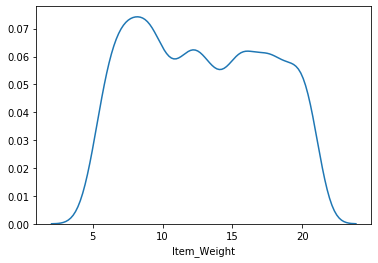

In [32]:
sns.distplot(train['Item_Weight'], hist=False, bins=10);

**Observation:**  Item_Weight is normly distributed between 5 to 20.

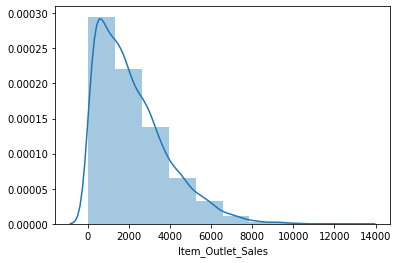

In [33]:
sns.distplot(train ['Item_Outlet_Sales'] , bins = 10)

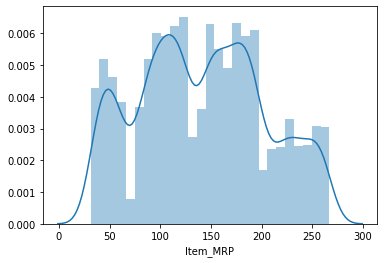

In [34]:
sns.distplot(train ['Item_MRP'])

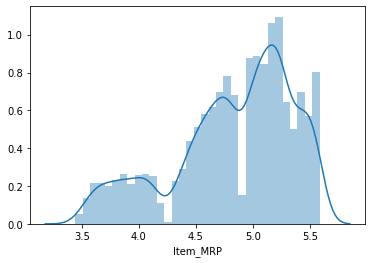

In [35]:
sns.distplot(np.log(train ['Item_MRP']))


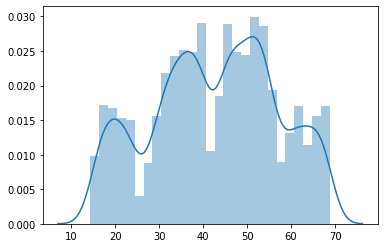

In [36]:
import scipy
ans,l=scipy.stats.boxcox(train ['Item_MRP'])
sns.distplot(ans)

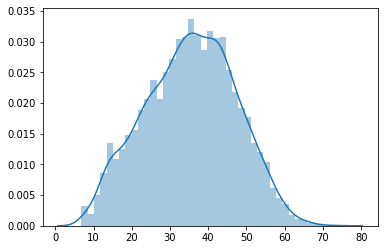

In [37]:
ans,l=scipy.stats.boxcox(train ['Item_Outlet_Sales'])
sns.distplot(ans)

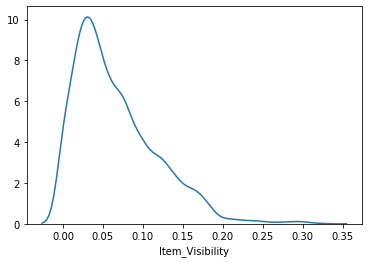

In [38]:
sns.distplot(train['Item_Visibility'], hist=False, bins=10);

**Observation:** Item_Visibility is Positively Skewed and hence we need to fix it.

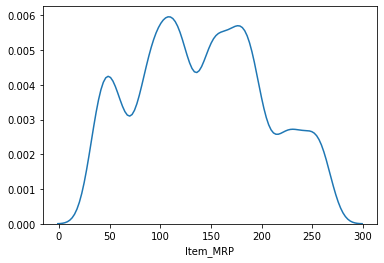

In [39]:
sns.distplot(train['Item_MRP'], hist=False, bins=10);

**Observation:** Item_MRP is also normly distributed between 50 to 250 

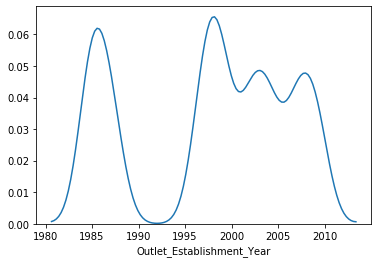

In [40]:
sns.distplot(train['Outlet_Establishment_Year'], hist=False, bins=10);

**Observation:**  Dataset contains more data of Outlet_Establishment_Year of 1980-1985 & 1995 -2010 

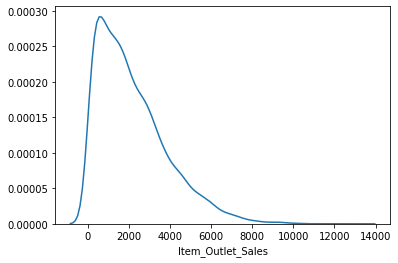

In [41]:
sns.distplot(train['Item_Outlet_Sales'], hist=False, bins=10);

**Observation:** Item_Outlet_Sales has more its values towards right i.e between 0 - 6000 . And, the data is also positively skewed.

In [42]:
print('Skewness: %f' % train['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %train['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtsis: 1.615877


**Univariate Analysis of Categorical Variables**

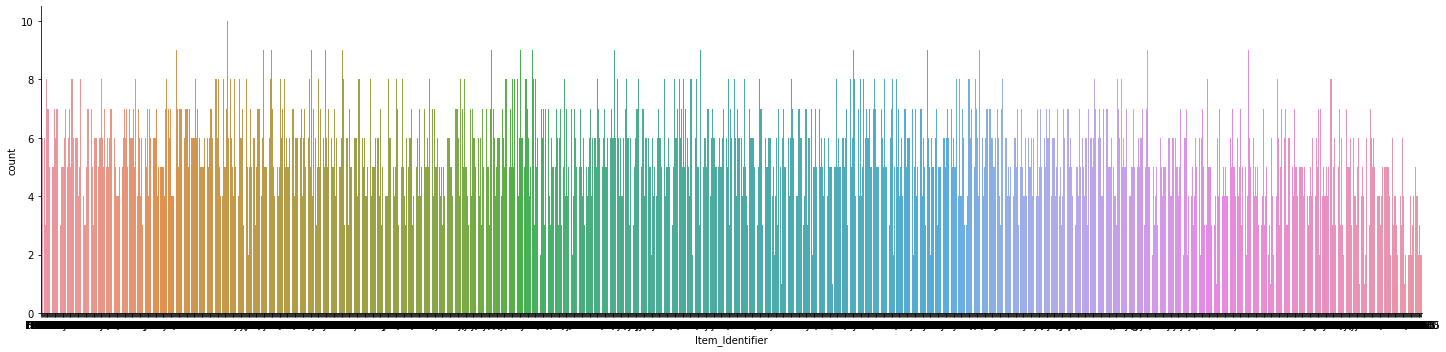

In [43]:
sns.catplot('Item_Identifier',kind = 'count',data = train,aspect =4)

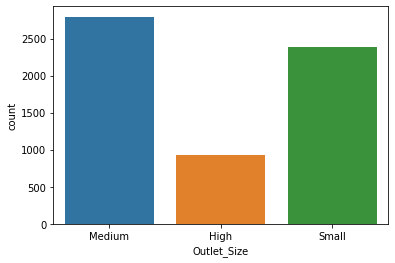

In [44]:
sns.countplot(train.Outlet_Size)

**Observation:** Customers prefer to go in Medium Outlet_Size to buy products then Small & High.Because Medium Outlet Size has all products in it & the cost of products would be not costly as comapred to the outlet_size --> high

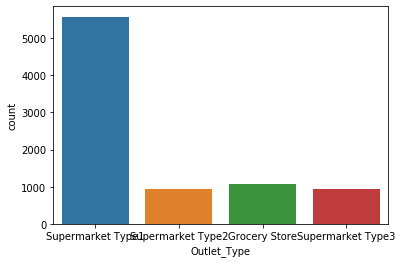

In [45]:
sns.countplot(train.Outlet_Type)

**Observation:**

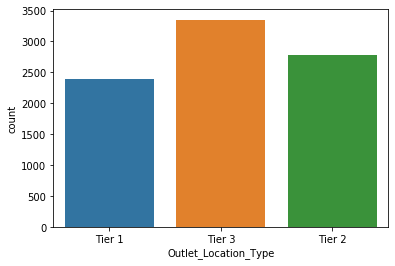

In [46]:
sns.countplot(train.Outlet_Location_Type)

**Observation:** In Tier 3 location type sales is High.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

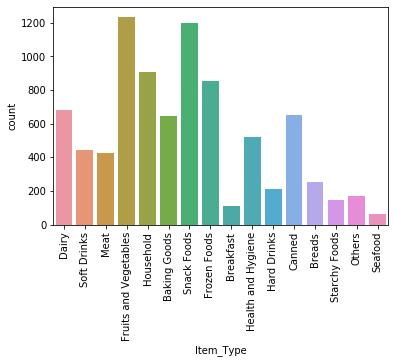

In [47]:
sns.countplot(train['Item_Type'])
plt.xticks(rotation=90)

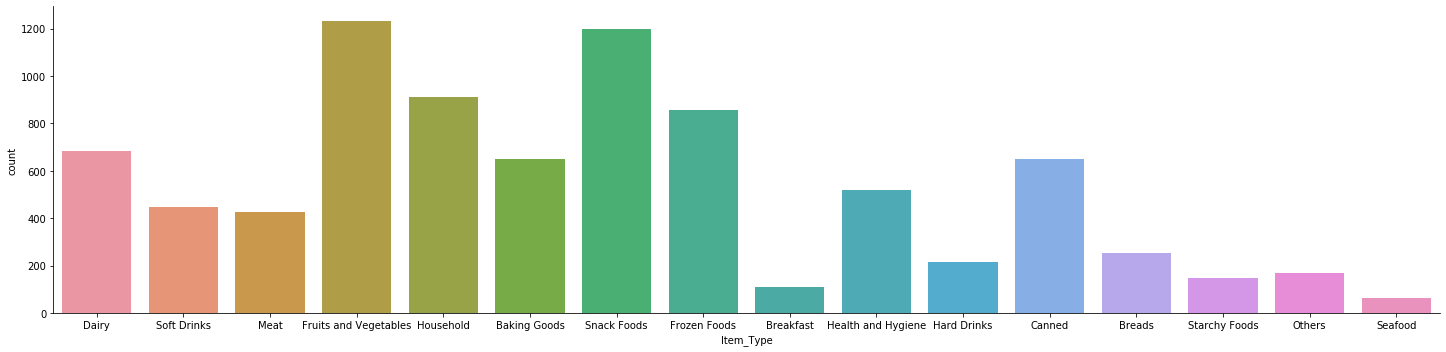

In [48]:
sns.catplot('Item_Type',kind = 'count',data = train,aspect =4)

**Observation:** Customers tend to buy more Fruits and vegetables , Snack Foods as comapred to the other Item_Type.

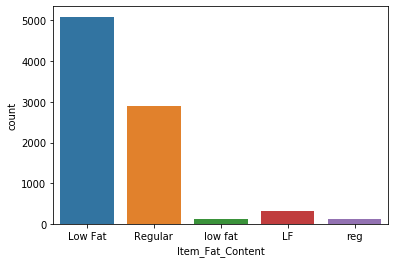

In [49]:
sns.countplot(train.Item_Fat_Content)

**Observation:** Customer prefer buying Low Fat Content products/Items.

**Observation:**
In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly we can be done for ‘reg’ and ‘Regular’ into one. After making these corrections we’ll plot the same figure again

In [50]:
train['Item_Fat_Content'].replace({'reg':'Regular','low fat':'Low Fat','LF':'Low Fat'},inplace = True)

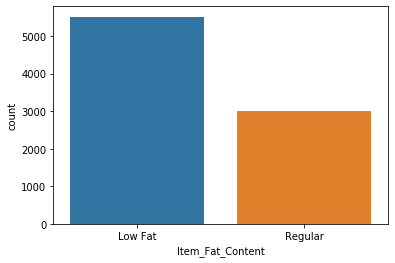

In [51]:
sns.countplot(train.Item_Fat_Content)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

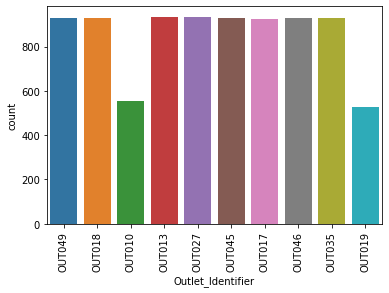

In [52]:
sns.countplot(train['Outlet_Identifier'])
plt.xticks(rotation=90)

**Observation:**

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

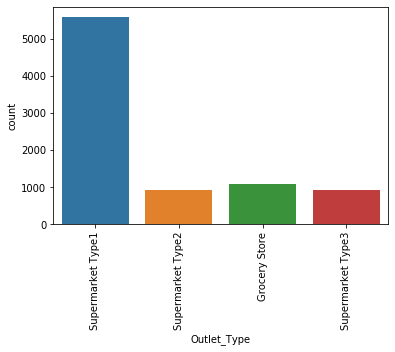

In [53]:
sns.countplot(train['Outlet_Type'])
plt.xticks(rotation=90)

**Observation:** SuperMarket type 1 has more count.

**Bivariate Anaylsis**

**Target Variable VS Categorical Variables**

(array([0, 1]), <a list of 2 Text xticklabel objects>)

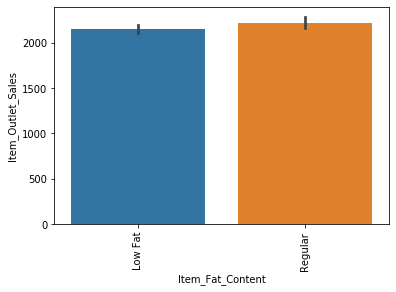

In [54]:
sns.barplot(train['Item_Fat_Content'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

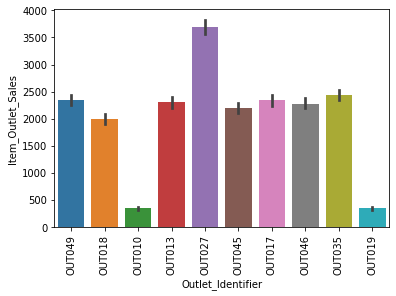

In [55]:
sns.barplot(train['Outlet_Identifier'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

**Observation:** Customers prefer OUT027 Outlet Identifier for sales more as comapred to others.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

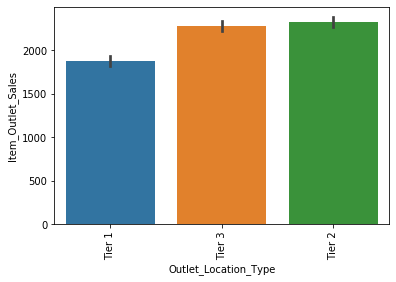

In [56]:
sns.barplot(train['Outlet_Location_Type'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

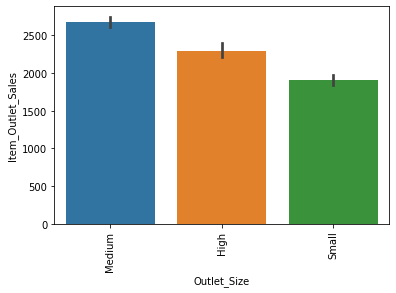

In [57]:
sns.barplot(train['Outlet_Size'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

**Observation:** Customers tend to buy products more from medium outlet_Size then High,Small.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

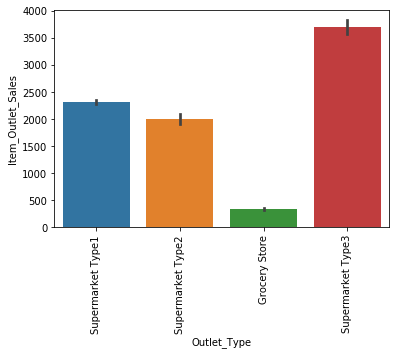

In [58]:
sns.barplot(train['Outlet_Type'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

**Observation:** Supermarket Type 3 has more sales as comapred to others. Which also means that Customers prefer to buy here.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

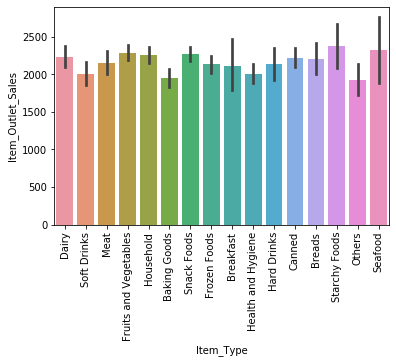

In [59]:
sns.barplot(train['Item_Type'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

**Bivariate Analysis of Numerical Variables**

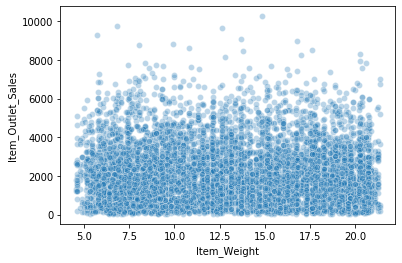

In [60]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = train,alpha = 0.3);

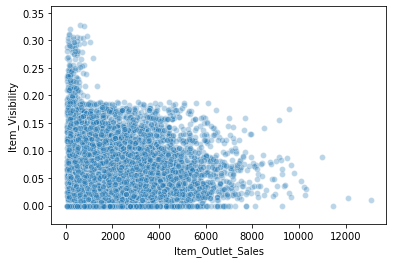

In [61]:
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Item_Visibility',data = train,alpha = 0.3)

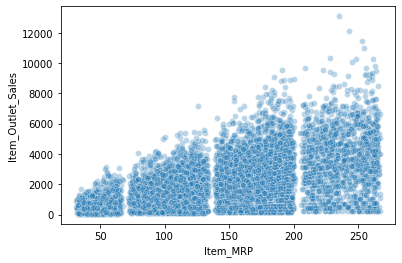

In [62]:
sns.scatterplot(x = 'Item_MRP',y = 'Item_Outlet_Sales',data = train,alpha = 0.3)


**Observation :**

1. For various MRP's the avg sales Outlet Sales lie between 0-6000.

2. As MRP of item increases , Sales increases

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

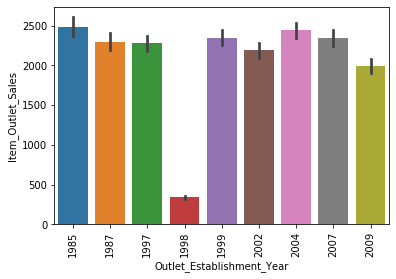

In [63]:
sns.barplot(train['Outlet_Establishment_Year'],train['Item_Outlet_Sales'])
plt.xticks(rotation=90)

In [64]:
#Item Weight - Item weight should depend upon the item type and Item_Fat_Content a per above numerical analysis with boxenplots
Item_Weight_group = train.groupby(["Item_Type","Item_Fat_Content"])["Item_Weight"]

print(Item_Weight_group.median())

train = train.reset_index()

Item_Type              Item_Fat_Content
Baking Goods           Low Fat             12.300
                       Regular             10.650
Breads                 Low Fat             12.600
                       Regular              8.600
Breakfast              Low Fat              8.895
                       Regular             11.600
Canned                 Low Fat             11.100
                       Regular             13.350
Dairy                  Low Fat             13.350
                       Regular             12.700
Frozen Foods           Low Fat             12.850
                       Regular             13.100
Fruits and Vegetables  Low Fat             12.500
                       Regular             13.800
Hard Drinks            Low Fat             10.100
Health and Hygiene     Low Fat             12.150
Household              Low Fat             13.150
Meat                   Low Fat             12.650
                       Regular             12.000
Others    

In [65]:
train.loc[train.Item_Weight.isnull(), 'Item_Weight'] = train.groupby(['Item_Type','Item_Fat_Content']).Item_Weight.transform('median')

In [66]:
# printing the total of nulls in Item_Weight Feature
print(train["Item_Weight"].isnull().sum())

0


In [67]:
train.isnull().sum()

index                           0
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

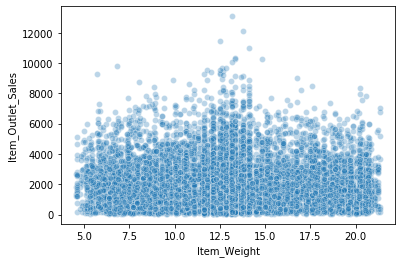

In [68]:
sns.scatterplot(x = 'Item_Weight',y = 'Item_Outlet_Sales',data = train,alpha = 0.3)

In [69]:
train.head(10)

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,7,FDP10,14.100,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


**Observation :** 

1. 

In [70]:
crosstable = pd.crosstab(train['Outlet_Location_Type'],train['Outlet_Size'])
crosstable

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0


**Observation :** 

1. Tier 3 Location & Outlet Size of Medium has more Sales.Which means people living in Tier 3 type prefer to go in medium outlet size so that they can get all items at one place. 

2. Tier 1 Location & Outlet Size of Small has second more sales.

3. Fact --> Medium & Small outlet size are more preferred due to MRP of Items as well.

In [71]:
train.loc[train.Outlet_Size.isnull(),['Outlet_Type','Outlet_Location_Type']].sample(10)

,Outlet_Type,Outlet_Location_Type
1471,Supermarket Type1,Tier 2
7831,Supermarket Type1,Tier 2
4300,Supermarket Type1,Tier 2
1610,Supermarket Type1,Tier 2
6902,Supermarket Type1,Tier 2
6465,Supermarket Type1,Tier 2
2124,Grocery Store,Tier 3
4072,Supermarket Type1,Tier 2
5372,Grocery Store,Tier 3
1401,Supermarket Type1,Tier 2


**Observation :** 

1. Null values of Outlet size are more for Grocery Store & Supermarket Type1 Outlet type & Tier2 & Tier 3 Location Type.

2. Fact --> In Tier 3 & 2 generally Outlet Size are small due to population size.


In [72]:
crosstable = pd.crosstab(train['Outlet_Size'],train['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


**Observation :**

1. Grocery Stores are always of small outlet size --> Fact

2. Supermarket Type 1 has too many values of Small outlet[This can be like small marts where u can get all stuffs.

3. As,Supermarket Type 1 with Tier 2 has null Outlet size acc. to observation small has more data/values and can be replaced the null values with small outlet size.

4. Grocery Stores with Tier 3 also has null outlet size & from obe=servation we can see that GS are generally small.So,we can replace null values with  small outlet size.

In [73]:
crosstable = pd.crosstab(train['Outlet_Location_Type'],train['Outlet_Type'])
crosstable

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528,1860,0,0
Tier 2,0,2785,0,0
Tier 3,555,932,928,935


In [74]:
crosstable = pd.crosstab(train['Outlet_Location_Type'],train['Outlet_Size'])
crosstable

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,930,1458
Tier 2,0,0,930
Tier 3,932,1863,0


In [75]:
train['Outlet_Size'].fillna('Small', inplace=True)

In [76]:
train.isnull().sum()

index                        0
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [77]:
crosstable = pd.crosstab(train['Item_Type'],train['Item_Visibility'])
crosstable

Item_Visibility,0.000000,0.003575,0.003589,0.003598,0.003599,0.003607,0.003612,0.005210,0.005231,0.005234,...,0.304737,0.304859,0.305305,0.306543,0.308145,0.309390,0.311090,0.321115,0.325781,0.328391
Item_Type,,,,,,,,,,,,,,,,,,,,,
Baking Goods,45,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
Breads,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Breakfast,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canned,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Dairy,38,0,0,0,0,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
Frozen Foods,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fruits and Vegetables,87,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
Hard Drinks,17,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Health and Hygiene,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Observation :** Item Visibility will never have 0 visibility.Hence,need to replace it with NaN value. 

In [78]:
# Replacing 0's with NaN
train.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)

In [79]:
# Now fill by mean of visibility based on item identifiers
train.Item_Visibility = train.Item_Visibility.fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

**Observation :** Visibility of particular item depends on its unique ID/ Identifier.Hence, We can group Item Identifier and Item Visibility so that NaN values will be replaced by mean.

In [80]:
crosstable = pd.crosstab(train['Item_Visibility'],train['Item_Type'])
crosstable

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Visibility,,,,,,,,,,,,,,,,
0.003575,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
0.003589,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
0.003598,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
0.003599,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
0.003607,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.309390,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0.311090,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.321115,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


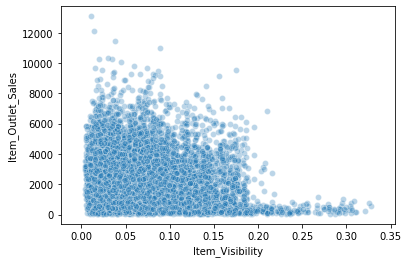

In [81]:
sns.scatterplot(x = 'Item_Visibility',y = 'Item_Outlet_Sales',data = train,alpha = 0.3)

**Obervation :** 

1. As Visibility decreases Sales of an item increases.

2. From 0.003-0.20 Visibility Range,Sales are more.


In [82]:
train.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           528
                      Supermarket Type1  Medium          930
                                         Small           930
Tier 2                Supermarket Type1  Small          2785
Tier 3                Grocery Store      Small           555
                      Supermarket Type1  High            932
                      Supermarket Type2  Medium          928
                      Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

**Observation:** 

1.Tier 1 Location has Grocery Store which is of Oulet size --> small & Supermartket Type 1 which is of Medium Outlet Size in it.

2.Tier 2 has Supermarket Type1 Oulet Type which has Outlet size --> small.

3. Tier 3 has :

      a) Supermarket Type1 which has High Oulet Size.

      b) Supermarket Type2 which has Medium Oulet Size.
      
      c) Supermarket Type3 which has Medium Outlet Size. 

In [83]:
train.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT045               929
             OUT017               926
             OUT010               555
             OUT019               528
Name: Outlet_Identifier, dtype: int64

**Observation:** 

1. High Outlet Size has OUT013 Identifier.

2. Medium Oulet Size has OUT027 , OUT049 , OUT018 Identifier.

3. Small Oulet Size has OUT035 , OUT046 , OUT019 Identifier.

In [84]:
train.pivot_table(values="Item_Outlet_Sales",index=['Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet_Identifier'],aggfunc=np.sum)

Item_Outlet_Sales
Outlet_Location_Type Outlet_Size Outlet_Type       Outlet_Identifier                   
Tier 1               Medium      Supermarket Type1 OUT049                  2.183970e+06
                     Small       Grocery Store     OUT019                  1.796941e+05
                                 Supermarket Type1 OUT046                  2.118395e+06
Tier 2               Small       Supermarket Type1 OUT017                  2.167465e+06
                                                   OUT035                  2.268123e+06
                                                   OUT045                  2.036725e+06
Tier 3               High        Supermarket Type1 OUT013                  2.142664e+06
                     Medium      Supermarket Type2 OUT018                  1.851823e+06
                                 Supermarket Type3 OUT027                  3.453926e+06
                     Small       Grocery Store     OUT010                  1.883402e+05

**Observation :** Item Outlet Sales increase/more where a particular Mart is of Supermarket Type 3 which is of Medium size and located at Tier 3 location.And Type 3 has OUT027. 

In [85]:
plot_identifier = train.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales")
plot_identifier

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,339.351662
OUT013,2298.995256
OUT017,2340.675263
OUT018,1995.498739
OUT019,340.329723
OUT027,3694.038558
OUT035,2438.841866
OUT045,2192.384798
OUT046,2277.844267


**Observation :** 

1. OUT027 -> More sales

2. OUT035 

3. OUT017

In [86]:
#grouped = train.groupby('Item_Type','Outlet_Type')
train.groupby(['Item_Type']).Outlet_Size.value_counts()

Item_Type              Outlet_Size
Baking Goods           Small          372
                       Medium         203
                       High            73
Breads                 Small          143
                       Medium          83
                       High            25
Breakfast              Small           61
                       Medium          36
                       High            13
Canned                 Small          367
                       Medium         217
                       High            65
Dairy                  Small          384
                       Medium         218
                       High            80
Frozen Foods           Small          490
                       Medium         274
                       High            92
Fruits and Vegetables  Small          677
                       Medium         413
                       High           142
Hard Drinks            Small          116
                       Medium          75

In [87]:
train.groupby('Item_Type').Item_Identifier.value_counts()

Item_Type      Item_Identifier
Baking Goods   FDU12              9
               FDV60              9
               FDG24              8
               FDR48              8
               FDT24              8
                                 ..
Starchy Foods  FDA22              3
               FDD23              3
               FDI35              3
               FDZ34              3
               FDC23              1
Name: Item_Identifier, Length: 1559, dtype: int64

In [88]:
Item_group = train.groupby(["Item_Type","Item_Fat_Content","Item_MRP"])["Item_Identifier"]
for i in Item_group:
  print(i)

(('Baking Goods', 'Low Fat', 33.9874), 3140    FDT36
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 35.0874), 6828    FDT36
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 35.2874), 5139    FDT36
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 35.6874), 2624    FDT36
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 36.7164), 7691    FDW23
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 37.0164), 5318    FDW23
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 37.2164), 8115    FDW23
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 37.2874), 6315    FDT36
7730    FDT36
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 37.3164), 430    FDW23
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 37.5164), 5120    FDW23
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 40.1164), 4638    FDW23
Name: Item_Identifier, d

Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 156.7604), 1132    FDO24
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 157.0288), 6977    FDH24
7714    FDH24
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 157.3604), 5676    FDN60
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 157.4604), 179    FDO24
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 157.5288), 8515    FDH24
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 157.6604), 7713    FDN60
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 158.1604), 4484    FDO24
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 158.4604), 331    FDN60
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 158.6604), 6449    FDN60
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 158.8604), 7370    FDO24
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Low Fat', 1

Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Regular', 104.5332), 7756    FDJ36
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Regular', 105.8648), 6651    FDB12
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Regular', 107.95700000000001), 5666    FDS36
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Regular', 108.15700000000001), 8519    FDS36
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Regular', 109.85700000000001), 4986    FDS36
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Regular', 110.15700000000001), 8279    FDS36
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Regular', 110.557), 5570    FDS36
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Regular', 111.85700000000001), 6299    FDS36
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Regular', 120.3098), 5840    FDG12
Name: Item_Identifier, dtype: object)
(('Baking Goods', 'Regular', 120.8072), 6121    FDA35
Name: Item_Identifier, dtype: o

Name: Item_Identifier, dtype: object)
(('Breads', 'Low Fat', 121.7414), 6581    FDW47
Name: Item_Identifier, dtype: object)
(('Breads', 'Low Fat', 121.8414), 4619    FDW47
Name: Item_Identifier, dtype: object)
(('Breads', 'Low Fat', 122.0098), 4348    FDU11
Name: Item_Identifier, dtype: object)
(('Breads', 'Low Fat', 122.8414), 3553    FDW47
Name: Item_Identifier, dtype: object)
(('Breads', 'Low Fat', 123.2046), 6045    FDV23
Name: Item_Identifier, dtype: object)
(('Breads', 'Low Fat', 123.8414), 5692    FDW47
Name: Item_Identifier, dtype: object)
(('Breads', 'Low Fat', 124.4046), 1096    FDV23
Name: Item_Identifier, dtype: object)
(('Breads', 'Low Fat', 125.6046), 3896    FDV23
Name: Item_Identifier, dtype: object)
(('Breads', 'Low Fat', 125.7046), 4516    FDV23
Name: Item_Identifier, dtype: object)
(('Breads', 'Low Fat', 126.0046), 8370    FDV23
Name: Item_Identifier, dtype: object)
(('Breads', 'Low Fat', 126.4994), 6669    FDS23
Name: Item_Identifier, dtype: object)
(('Breads', 'Low

Name: Item_Identifier, dtype: object)
(('Breakfast', 'Regular', 56.3614), 15    FDP49
Name: Item_Identifier, dtype: object)
(('Breakfast', 'Regular', 56.7588), 6196    FDN25
Name: Item_Identifier, dtype: object)
(('Breakfast', 'Regular', 57.7588), 3932    FDN25
Name: Item_Identifier, dtype: object)
(('Breakfast', 'Regular', 58.5588), 1806    FDN25
Name: Item_Identifier, dtype: object)
(('Breakfast', 'Regular', 59.2588), 1907    FDN25
Name: Item_Identifier, dtype: object)
(('Breakfast', 'Regular', 90.5804), 7403    FDL25
Name: Item_Identifier, dtype: object)
(('Breakfast', 'Regular', 91.8804), 581    FDL25
Name: Item_Identifier, dtype: object)
(('Breakfast', 'Regular', 93.1804), 567    FDL25
Name: Item_Identifier, dtype: object)
(('Breakfast', 'Regular', 100.7332), 4460    FDM01
Name: Item_Identifier, dtype: object)
(('Breakfast', 'Regular', 101.1332), 7096    FDM01
Name: Item_Identifier, dtype: object)
(('Breakfast', 'Regular', 102.6332), 629    FDM01
Name: Item_Identifier, dtype: obje

Name: Item_Identifier, dtype: object)
(('Canned', 'Low Fat', 152.934), 6954    FDF14
Name: Item_Identifier, dtype: object)
(('Canned', 'Low Fat', 153.4682), 770     FDW01
2181    FDW01
Name: Item_Identifier, dtype: object)
(('Canned', 'Low Fat', 154.4682), 2840    FDW01
3823    FDW01
Name: Item_Identifier, dtype: object)
(('Canned', 'Low Fat', 155.0972), 7364    FDL26
Name: Item_Identifier, dtype: object)
(('Canned', 'Low Fat', 155.2972), 3423    FDL26
Name: Item_Identifier, dtype: object)
(('Canned', 'Low Fat', 156.6972), 8455    FDL26
Name: Item_Identifier, dtype: object)
(('Canned', 'Low Fat', 157.3972), 1188    FDL26
Name: Item_Identifier, dtype: object)
(('Canned', 'Low Fat', 160.7894), 6998    FDK50
Name: Item_Identifier, dtype: object)
(('Canned', 'Low Fat', 161.8894), 5174    FDK50
Name: Item_Identifier, dtype: object)
(('Canned', 'Low Fat', 162.4894), 4411    FDK50
Name: Item_Identifier, dtype: object)
(('Canned', 'Low Fat', 163.2894), 4649    FDK50
Name: Item_Identifier, dtyp

Name: Item_Identifier, dtype: object)
(('Canned', 'Regular', 90.9172), 1124    FDL38
Name: Item_Identifier, dtype: object)
(('Canned', 'Regular', 91.31200000000001), 4295    FDB14
Name: Item_Identifier, dtype: object)
(('Canned', 'Regular', 91.8488), 5063    FDH02
Name: Item_Identifier, dtype: object)
(('Canned', 'Regular', 92.2488), 4798    FDH02
Name: Item_Identifier, dtype: object)
(('Canned', 'Regular', 92.31200000000001), 4637    FDB14
Name: Item_Identifier, dtype: object)
(('Canned', 'Regular', 92.4488), 5477    FDH02
Name: Item_Identifier, dtype: object)
(('Canned', 'Regular', 92.512), 122    FDB14
Name: Item_Identifier, dtype: object)
(('Canned', 'Regular', 92.81200000000001), 6551    FDN50
Name: Item_Identifier, dtype: object)
(('Canned', 'Regular', 93.212), 457     FDB14
5490    FDB14
Name: Item_Identifier, dtype: object)
(('Canned', 'Regular', 93.712), 1258    FDN50
6357    FDN50
Name: Item_Identifier, dtype: object)
(('Canned', 'Regular', 94.31200000000001), 1215    FDB14
N

Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 36.1874), 7328    FDT02
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 36.6506), 3085    DRF51
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 37.4506), 7306    DRF51
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 38.0506), 6743    DRF51
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 38.8138), 788     DRF03
4341    DRF03
8049    DRF03
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 39.1138), 2298    DRG27
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 39.7138), 1264    DRF03
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 39.9138), 91    DRG27
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 40.2138), 561    DRF03
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 40.3138), 2868    DRF03
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 41.1138), 5537    DRG27
Name: Item_Identifier, dtype: object)
(('Dairy', 'L

Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 178.3344), 887    FDY27
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 178.6002), 1320    FDM39
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 178.7002), 7925    FDM39
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 179.1344), 6846    FDY27
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 179.5344), 7055    FDY27
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 180.4292), 7182    FDX26
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 180.6292), 2980    FDX26
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 181.4292), 3495    FDX26
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 182.3292), 2653    FDX26
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 182.5292), 7506    FDX26
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 182.6292), 364    FDX26
Name: Item_Identifier, dtype: object)
(('Dairy', 'Low Fat', 184.129

Name: Item_Identifier, dtype: object)
(('Dairy', 'Regular', 110.35700000000001), 4914    FDD52
Name: Item_Identifier, dtype: object)
(('Dairy', 'Regular', 110.85700000000001), 7642    FDD52
Name: Item_Identifier, dtype: object)
(('Dairy', 'Regular', 111.65700000000001), 1646    FDD52
Name: Item_Identifier, dtype: object)
(('Dairy', 'Regular', 112.1518), 5981    FDA51
Name: Item_Identifier, dtype: object)
(('Dairy', 'Regular', 112.2518), 863    FDA51
Name: Item_Identifier, dtype: object)
(('Dairy', 'Regular', 112.8176), 183    FDU50
Name: Item_Identifier, dtype: object)
(('Dairy', 'Regular', 112.9176), 4383    FDU50
Name: Item_Identifier, dtype: object)
(('Dairy', 'Regular', 113.2518), 1240    FDA51
Name: Item_Identifier, dtype: object)
(('Dairy', 'Regular', 114.7176), 679    FDU50
Name: Item_Identifier, dtype: object)
(('Dairy', 'Regular', 115.3176), 7481    FDU50
Name: Item_Identifier, dtype: object)
(('Dairy', 'Regular', 116.3176), 5758    FDU50
Name: Item_Identifier, dtype: object)


Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 60.1536), 7448    FDY52
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 60.2878), 4630    FDE29
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 60.5904), 8260    FDD28
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 61.351000000000006), 7137    FDZ04
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 61.4878), 3014    FDE29
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 61.651), 766    FDZ04
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 61.6878), 5941    FDE29
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 62.0168), 4624    FDP04
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 62.0878), 3608    FDE29
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 62.151), 4362    FDZ04
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 62.351000000000

Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 154.463), 1228    FDU52
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 155.3998), 5211    FDN40
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 157.063), 6997    FDU52
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 157.263), 529    FDU52
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 157.563), 4954    FDU52
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 159.4578), 8203    FDJ52
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 159.8578), 3455    FDJ52
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 160.6578), 4300    FDJ52
4878    FDJ52
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 161.3578), 4080    FDJ52
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low Fat', 177.96599999999998), 7224    FDM28
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Low 

Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 91.6804), 7229    FDW16
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 92.4488), 4250    FDH04
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 93.0804), 7736    FDW16
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 93.1804), 4388    FDW16
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 93.7804), 7027    FDW16
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 95.8726), 7731    FDH17
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 96.3726), 6220    FDH17
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 96.9726), 8    FDH17
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 97.0726), 2718    FDH17
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 97.3726), 5276    FDH17
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 97.4726), 7819    FDH17
Na

Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 246.2144), 7052    FDT52
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 246.2486), 3709    FDG17
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 246.4144), 262    FDG28
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 257.2962), 3022    FDA04
5572    FDA04
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 258.1962), 1901    FDA04
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 258.7278), 2995    FDT16
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 259.1962), 5602    FDA04
6132    FDA04
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 259.6936), 4145    FDP28
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 259.7936), 4465    FDP28
Name: Item_Identifier, dtype: object)
(('Frozen Foods', 'Regular', 259.7962), 1409    FDA04
Name: Item_Identifier, dtype: object)
(('Frozen Foods

Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 113.7518), 5767    FDS07
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 113.9518), 6452    FDS07
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 114.1518), 5626    FDC44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 114.4518), 6967    FDC44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 114.8518), 7577    FDC44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 114.9492), 6078    FDE21
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 115.0834), 5334    FDI32
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 115.1518), 3708    FDC44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 115.1834), 174    FDI32
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 115.3492), 6093 

Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 182.4976), 6253    FDD09
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 182.6266), 427    FDN32
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 182.7292), 7781    FDS20
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 183.8292), 4632    FDS20
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 183.9292), 3427    FDS20
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 184.62400000000002), 2057    FDA20
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 184.7266), 472     FDU56
6764    FDN32
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 184.8266), 7723    FDN32
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Low Fat', 185.1266), 5038    FDN32
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Lo

Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 63.2194), 7499    FDE56
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 63.2536), 2029    FDG56
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 63.4194), 6474    FDE56
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 63.7194), 7653    FDZ07
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 64.9168), 2490    FDP31
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 65.0168), 7960    FDP31
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 65.7168), 4115    FDP31
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 74.3012), 7184    FDS19
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 75.8012), 6625    FDS19
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 76.0012), 5882    FDS19


Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 161.0552), 2719    FDU44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 161.2578), 8066    FDV19
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 161.9578), 3900    FDV19
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 162.1552), 857    FDU44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 162.2578), 6564    FDV19
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 162.3552), 8490    FDU44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 162.5526), 7707    FDA08
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 163.1526), 7441    FDO08
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 163.4552), 247    FDU44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 163.8526), 3619  

Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 234.9958), 7060    FDX31
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 237.3564), 6526    FDU43
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 238.3538), 1624    FDS44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 238.6564), 7421    FDU43
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 238.8538), 5360    FDS44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 238.9538), 822    FDS44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 239.6538), 2390    FDS44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 240.4512), 4150    FDZ43
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 240.9538), 4006    FDS44
Name: Item_Identifier, dtype: object)
(('Fruits and Vegetables', 'Regular', 241.0512), 6344 

Name: Item_Identifier, dtype: object)
(('Hard Drinks', 'Low Fat', 179.86599999999999), 3672    DRN47
Name: Item_Identifier, dtype: object)
(('Hard Drinks', 'Low Fat', 180.666), 1762    DRN47
2676    DRN47
Name: Item_Identifier, dtype: object)
(('Hard Drinks', 'Low Fat', 180.766), 3550    DRN47
Name: Item_Identifier, dtype: object)
(('Hard Drinks', 'Low Fat', 187.6872), 7178    DRJ23
Name: Item_Identifier, dtype: object)
(('Hard Drinks', 'Low Fat', 188.1872), 3118    DRJ23
3956    DRJ23
5681    DRJ23
Name: Item_Identifier, dtype: object)
(('Hard Drinks', 'Low Fat', 188.4872), 7266    DRJ11
Name: Item_Identifier, dtype: object)
(('Hard Drinks', 'Low Fat', 188.7872), 6995    DRJ11
Name: Item_Identifier, dtype: object)
(('Hard Drinks', 'Low Fat', 188.9872), 5268    DRJ11
Name: Item_Identifier, dtype: object)
(('Hard Drinks', 'Low Fat', 189.0872), 5978    DRJ11
Name: Item_Identifier, dtype: object)
(('Hard Drinks', 'Low Fat', 189.1846), 7804    DRM47
Name: Item_Identifier, dtype: object)
((

Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 110.3228), 8258    NCV41
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 110.4544), 7013    NCY53
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 111.0544), 6126    NCY53
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 111.6544), 7527    NCY53
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 112.5228), 1387    NCV41
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 113.3544), 5985    NCY53
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 114.0492), 4401    NCR17
5475    NCR17
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 114.4492), 7226    NCX05
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 114.5492), 94    NCR17
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 114.8492), 5156    NCX05
6572    

Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 231.23), 5717    NCX17
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 232.83), 7042    NCX17
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 233.03), 7158    NCX17
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 234.65900000000002), 4991    NCQ53
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 235.25900000000001), 6410    NCQ53
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 235.6906), 7940    NCP53
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 236.25900000000001), 6205    NCQ53
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 236.6906), 4118    NCP53
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 237.05900000000003), 2450    NCQ53
Name: Item_Identifier, dtype: object)
(('Health and Hygiene', 'Low Fat', 237.1590000

Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 106.3938), 5233    NCS18
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 106.4938), 2701    NCS18
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 106.7964), 8398    NCD43
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 106.9964), 7314    NCC07
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 107.3912), 2500    NCI54
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 107.7622), 3998    NCX54
7061    NCX54
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 107.7912), 5949    NCI54
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 108.0938), 6161    NCS18
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 108.1912), 2130    NCI54
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 108.4938), 4928    NCS18
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 108.6938), 6762    NCS18
Name: I

Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 158.8604), 8318    NCA42
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 159.4604), 4132    NCA42
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 159.5604), 4703    NCH07
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 159.6604), 1292    NCA42
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 159.7604), 5359    NCH07
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 159.7894), 1690    NCE06
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 160.2894), 527    NCE06
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 160.292), 131    NCH54
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 160.4604), 5290    NCH07
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 160.692), 5408    NCH54
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 160.7894), 4813    NCE06
Name: Item_Identifier, dt

Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 215.2218), 2155    NCQ50
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 215.7218), 2463    NCQ50
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 215.9192), 2554    NCH43
3407    NCK42
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 216.0192), 1934    NCH43
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 216.4192), 8502    NCH43
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 216.6192), 4634    NCH43
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 217.4192), 2925    NCH43
2987    NCK42
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 217.6192), 899    NCK42
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 220.5456), 5454    NCW42
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 220.7456), 1086    NCW42
Name: Item_Identifier, dtype: object)
(('Household', 'Low Fat', 220.8456), 4803    

Name: Item_Identifier, dtype: object)
(('Meat', 'Low Fat', 172.0738), 6427    FDH19
Name: Item_Identifier, dtype: object)
(('Meat', 'Low Fat', 172.4738), 1333    FDH19
Name: Item_Identifier, dtype: object)
(('Meat', 'Low Fat', 172.5738), 66    FDH19
Name: Item_Identifier, dtype: object)
(('Meat', 'Low Fat', 173.1738), 275    FDH19
Name: Item_Identifier, dtype: object)
(('Meat', 'Low Fat', 173.8738), 4665    FDH19
Name: Item_Identifier, dtype: object)
(('Meat', 'Low Fat', 175.1738), 2702    FDH19
Name: Item_Identifier, dtype: object)
(('Meat', 'Low Fat', 175.4738), 413    FDH19
Name: Item_Identifier, dtype: object)
(('Meat', 'Low Fat', 181.7292), 8178    FDR39
Name: Item_Identifier, dtype: object)
(('Meat', 'Low Fat', 181.7608), 3632    FDT03
Name: Item_Identifier, dtype: object)
(('Meat', 'Low Fat', 182.3608), 6223    FDT03
Name: Item_Identifier, dtype: object)
(('Meat', 'Low Fat', 182.4292), 3272    FDR39
Name: Item_Identifier, dtype: object)
(('Meat', 'Low Fat', 183.1608), 4764    FD

Name: Item_Identifier, dtype: object)
(('Meat', 'Regular', 225.9404), 260    FDJ55
Name: Item_Identifier, dtype: object)
(('Meat', 'Regular', 226.0404), 964    FDJ55
Name: Item_Identifier, dtype: object)
(('Meat', 'Regular', 226.8404), 686    FDJ55
Name: Item_Identifier, dtype: object)
(('Meat', 'Regular', 227.9352), 8491    FDO03
Name: Item_Identifier, dtype: object)
(('Meat', 'Regular', 228.1352), 8201    FDO03
Name: Item_Identifier, dtype: object)
(('Meat', 'Regular', 230.5352), 2465    FDO03
4688    FDO03
Name: Item_Identifier, dtype: object)
(('Meat', 'Regular', 232.8616), 2725    FDT27
Name: Item_Identifier, dtype: object)
(('Meat', 'Regular', 232.9616), 7853    FDT27
Name: Item_Identifier, dtype: object)
(('Meat', 'Regular', 233.1616), 352    FDT27
Name: Item_Identifier, dtype: object)
(('Meat', 'Regular', 233.9616), 4133    FDT27
Name: Item_Identifier, dtype: object)
(('Meat', 'Regular', 234.6616), 2025    FDT27
Name: Item_Identifier, dtype: object)
(('Meat', 'Regular', 235.624

Name: Item_Identifier, dtype: object)
(('Seafood', 'Regular', 173.4764), 2728    FDG33
Name: Item_Identifier, dtype: object)
(('Seafood', 'Regular', 173.5764), 7011    FDG33
Name: Item_Identifier, dtype: object)
(('Seafood', 'Regular', 173.6764), 6112    FDG33
Name: Item_Identifier, dtype: object)
(('Seafood', 'Regular', 173.7764), 7726    FDG33
Name: Item_Identifier, dtype: object)
(('Seafood', 'Regular', 184.3582), 6814    FDJ57
Name: Item_Identifier, dtype: object)
(('Seafood', 'Regular', 184.6582), 7418    FDJ57
Name: Item_Identifier, dtype: object)
(('Seafood', 'Regular', 184.8582), 866    FDJ57
Name: Item_Identifier, dtype: object)
(('Seafood', 'Regular', 185.0582), 1401    FDJ57
Name: Item_Identifier, dtype: object)
(('Seafood', 'Regular', 185.3582), 8496    FDJ57
Name: Item_Identifier, dtype: object)
(('Seafood', 'Regular', 186.5582), 2767    FDJ57
Name: Item_Identifier, dtype: object)
(('Seafood', 'Regular', 187.7582), 8423    FDJ57
Name: Item_Identifier, dtype: object)
(('Sea

Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 128.7678), 5033    FDH22
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 130.8626), 2588    FDM34
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 131.0626), 6360    FDM34
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 132.9626), 5273    FDM34
7054    FDM34
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 139.81799999999998), 3381    FDV46
7405    FDV46
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 139.9496), 5838    FDL34
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 140.2154), 202    FDN57
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 140.2496), 4478    FDL34
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 140.718), 1002    FDV46
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 140.81799999999998), 3322    FDV46
Name: Item_Identifier, dtype: object)
(('Sna

Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 188.9898), 5855    FDY46
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 189.5556), 5252    FDV45
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 189.7504), 3718    FDJ22
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 190.3504), 6505    FDJ22
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 190.6504), 8003    FDJ22
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 190.9504), 344    FDJ22
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 191.8478), 2170    FDH10
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 192.4478), 3154    FDH10
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 192.5504), 6615    FDJ22
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 192.6478), 2209    FDH10
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Low Fat', 192.9136), 42    FDA46
Na

(('Snack Foods', 'Regular', 58.2588), 2713    FDG10
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 58.3588), 945    FDO10
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 58.7562), 2611    FDX46
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 58.7588), 4552    FDO10
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 58.8562), 3283    FDT10
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 58.8588), 8197    FDO10
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 59.1562), 3019    FDX46
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 60.4562), 4573    FDX46
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 60.6562), 4720    FDT10
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 60.9562), 1247    FDT10
3367    FDT10
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 61.9168), 2332    FDI21
Name: Item_Identifier, dtype: objec

Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 154.463), 1519    FDV22
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 154.5972), 7880    FDC34
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 155.2972), 5201    FDC34
7078    FDC34
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 155.4972), 5732    FDC34
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 155.5288), 889    FDR57
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 155.763), 1160    FDV22
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 156.1288), 4892    FDR57
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 156.1972), 7773    FDG58
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 156.7972), 5129    FDG58
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 156.8972), 2875    FDG58
Name: Item_Identifier, dtype: object)
(('Snack Foods', 'Regular', 157.0972), 49

Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 83.8592), 2781    DRH49
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 84.1592), 3852    DRH49
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 84.3592), 2733    DRH49
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 85.2882), 6695    DRC25
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 85.3882), 6689    DRC25
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 85.5198), 4444    DRE13
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 85.5882), 2796    DRC25
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 85.8198), 1234    DRE13
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 86.0882), 2671    DRC25
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 86.5198), 2698    DRE13
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 86.6198), 7374    DRE13
Name: Item

Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 224.972), 304    DRE60
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 225.372), 108    DRE60
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 226.072), 2699    DRE60
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 226.172), 7283    DRE60
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 227.872), 8028    DRE60
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 236.5564), 2189    DRF60
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 236.8564), 2972    DRD49
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 237.4564), 3289    DRD49
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 237.7564), 5017    DRD49
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 238.1564), 7952    DRF60
Name: Item_Identifier, dtype: object)
(('Soft Drinks', 'Low Fat', 239.4564), 813    DRD49
Name: I

Name: Item_Identifier, dtype: object)
(('Starchy Foods', 'Regular', 171.3448), 5516    FDD47
Name: Item_Identifier, dtype: object)
(('Starchy Foods', 'Regular', 171.7448), 7745    FDD47
Name: Item_Identifier, dtype: object)
(('Starchy Foods', 'Regular', 171.8448), 6012    FDD47
Name: Item_Identifier, dtype: object)
(('Starchy Foods', 'Regular', 171.9448), 1529    FDD47
Name: Item_Identifier, dtype: object)
(('Starchy Foods', 'Regular', 172.3448), 2031    FDD47
8411    FDD47
Name: Item_Identifier, dtype: object)
(('Starchy Foods', 'Regular', 173.5738), 397     FDG35
4083    FDG35
Name: Item_Identifier, dtype: object)
(('Starchy Foods', 'Regular', 173.6738), 5165    FDG35
Name: Item_Identifier, dtype: object)
(('Starchy Foods', 'Regular', 173.8738), 4043    FDG35
Name: Item_Identifier, dtype: object)
(('Starchy Foods', 'Regular', 175.7738), 6714    FDG35
Name: Item_Identifier, dtype: object)
(('Starchy Foods', 'Regular', 183.5924), 3400    FDE11
Name: Item_Identifier, dtype: object)
(('S

In [89]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
train['Item_Type_Combined'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64

**Observation :** Dataset has more values for Food(FD) Item Type then NC(Non-Consumable) & then Drinks(DR)

In [90]:
train.head(5)

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [91]:
columns = ['Item_Identifier', 'Item_Type_Combined','Item_Type', 'Item_Fat_Content', 'Item_Weight', 'Item_Visibility',
         'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']
train = train[columns]
train.head()

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,FD,Dairy,Low Fat,9.30,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,DR,Soft Drinks,Regular,5.92,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,FD,Meat,Low Fat,17.50,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,FD,Fruits and Vegetables,Regular,19.20,0.022911,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,NC,Household,Low Fat,8.93,0.016164,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [92]:
train.pivot_table(values="Item_Outlet_Sales",index=['Item_Type_Combined','Item_Type'],aggfunc='sum')

Item_Outlet_Sales
Item_Type_Combined Item_Type                               
DR                 Dairy                       2.451782e+05
                   Hard Drinks                 4.577934e+05
                   Soft Drinks                 8.928977e+05
FD                 Baking Goods                1.265525e+06
                   Breads                      5.532372e+05
                   Breakfast                   2.322990e+05
                   Canned                      1.444151e+06
                   Dairy                       1.277416e+06
                   Frozen Foods                1.825735e+06
                   Fruits and Vegetables       2.820060e+06
                   Meat                        9.175656e+05
                   Seafood                     1.488682e+05
                   Snack Foods                 2.732786e+06
                   Starchy Foods               3.514013e+05
NC                 Health and Hygiene          1.045200e+06
                   Household                   2.055494e+06
                   Others                      3.255176e+05

In [93]:
train.pivot_table(values="Item_Outlet_Sales",index=['Item_Fat_Content','Item_Type_Combined','Item_Type'],aggfunc='sum')

Item_Outlet_Sales
Item_Fat_Content Item_Type_Combined Item_Type                               
Low Fat          DR                 Dairy                       2.451782e+05
                                    Hard Drinks                 4.577934e+05
                                    Soft Drinks                 7.612591e+05
                 FD                 Baking Goods                5.805237e+05
                                    Breads                      3.056808e+05
                                    Breakfast                   9.944189e+04
                                    Canned                      7.531716e+05
                                    Dairy                       6.515046e+05
                                    Frozen Foods                9.528910e+05
                                    Fruits and Vegetables       1.374916e+06
                                    Meat                        3.460549e+05
                                    Seafood                     7.058812e+04
                                    Snack Foods                 1.669089e+06
                                    Starchy Foods               2.097909e+05
                 NC                 Health and Hygiene          1.045200e+06
                                    Household                   2.055494e+06
                                    Others                      3.255176e+05
Regular          DR                 Soft Drinks                 1.316386e+05
                 FD                 Baking Goods                6.850017e+05
                                    Breads                      2.475564e+05
                                    Breakfast                   1.328571e+05
                                    Canned                      6.909799e+05
                                    Dairy                       6.259113e+05
                                    Frozen Foods                8.728438e+05
                                    Fruits and Vegetables       1.445144e+06
                                    Meat                        5.715107e+05
                                    Seafood                     7.828010e+04
                                    Snack Foods                 1.063697e+06
                                    Starchy Foods               1.416103e+05

In [94]:
train['Item_Type_Combined'].replace({'DR':'Drinks','FD':'Food','NC':'Non-Consumable'},inplace = True)

/home/hermione/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [95]:
train.pivot_table(values="Item_Outlet_Sales",index=['Item_Fat_Content','Item_Type_Combined','Item_Type'],aggfunc='sum')

Item_Outlet_Sales
Item_Fat_Content Item_Type_Combined Item_Type                               
Low Fat          Drinks             Dairy                       2.451782e+05
                                    Hard Drinks                 4.577934e+05
                                    Soft Drinks                 7.612591e+05
                 Food               Baking Goods                5.805237e+05
                                    Breads                      3.056808e+05
                                    Breakfast                   9.944189e+04
                                    Canned                      7.531716e+05
                                    Dairy                       6.515046e+05
                                    Frozen Foods                9.528910e+05
                                    Fruits and Vegetables       1.374916e+06
                                    Meat                        3.460549e+05
                                    Seafood                     7.058812e+04
                                    Snack Foods                 1.669089e+06
                                    Starchy Foods               2.097909e+05
                 Non-Consumable     Health and Hygiene          1.045200e+06
                                    Household                   2.055494e+06
                                    Others                      3.255176e+05
Regular          Drinks             Soft Drinks                 1.316386e+05
                 Food               Baking Goods                6.850017e+05
                                    Breads                      2.475564e+05
                                    Breakfast                   1.328571e+05
                                    Canned                      6.909799e+05
                                    Dairy                       6.259113e+05
                                    Frozen Foods                8.728438e+05
                                    Fruits and Vegetables       1.445144e+06
                                    Meat                        5.715107e+05
                                    Seafood                     7.828010e+04
                                    Snack Foods                 1.063697e+06
                                    Starchy Foods               1.416103e+05

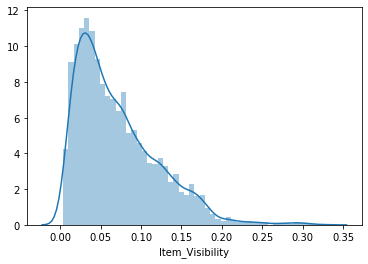

In [96]:
sns.distplot(train['Item_Visibility'])

In [97]:
train_num=train.select_dtypes(include=['int64','float64'])
list(train_num.columns)

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

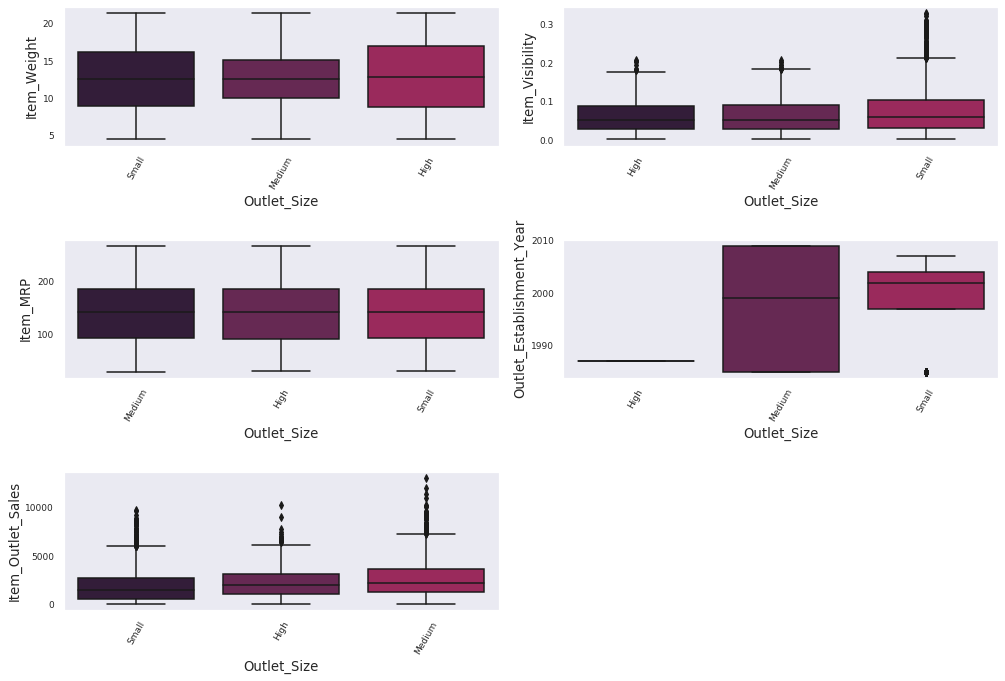

In [98]:
plt.figure(figsize=(14, 12))
count = 1
for cols in train_num:
    sns.set(style='dark', palette="rocket", font_scale=1.1)
    plt.subplot(4, 2, count)
    plt.tight_layout()
    #sns.boxenplot(x='Outlet_Type', y= cols, data=data)
    sorted_nb = train.groupby(['Outlet_Size'])[cols].median().sort_values()
    sns.boxplot(x=train['Outlet_Size'], y=train[cols], order=list(sorted_nb.index))
    plt.xticks(rotation=60)
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    
    count+=1

In [99]:
for name,size_group in train.groupby('Item_Type'):
    for quantity,quantity_group in size_group.groupby('Outlet_Size'):
        print(name,quantity)
        print(quantity_group.Item_Outlet_Sales.mean())
        train.loc[(train['Outlet_Size']==quantity) &(train.Item_Type==name),'history']=quantity_group.Item_Outlet_Sales.mean()

Baking Goods High
2050.9011342465747
Baking Goods Medium
2386.702771428571
Baking Goods Small
1697.0669268817198
Breads High
2080.731528
Breads Medium
2718.2448144578316
Breads Small
1927.3047622377626
Breakfast High
2104.2865076923076
Breakfast Medium
2865.0853555555555
Breakfast Small
1668.8549868852458
Canned High
2211.265203076923
Canned Medium
2562.0751050691238
Canned Small
2028.4712713896456
Dairy High
2453.1817125000002
Dairy Medium
2725.360676146789
Dairy Small
1906.7991843749994
Frozen Foods High
2214.096189130435
Frozen Foods Medium
2612.22985109489
Frozen Foods Small
1849.5652244897956
Fruits and Vegetables High
2405.1181028169003
Fruits and Vegetables Medium
2844.1009230024206
Fruits and Vegetables Small
1926.0256499261454
Hard Drinks High
2363.5899999999997
Hard Drinks Medium
2551.0792799999995
Hard Drinks Small
1828.4475103448274
Health and Hygiene High
1953.0424393442618
Health and Hygiene Medium
2475.142831764704
Health and Hygiene Small
1748.409230449827
Household Hig

In [100]:
from imblearn.under_sampling import TomekLinks

**Feature Encoding**
**Encoding Categorical Variables**

In [101]:
train.head()

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,history
0,FDA15,Food,Dairy,Low Fat,9.30,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2725.360676
1,DRC01,Drinks,Soft Drinks,Regular,5.92,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2437.250807
2,FDN15,Food,Meat,Low Fat,17.50,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2792.575217
3,FDX07,Food,Fruits and Vegetables,Regular,19.20,0.022911,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,1926.025650
4,NCD19,Non-Consumable,Household,Low Fat,8.93,0.016164,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2408.217992


In [102]:
categorical_var = train.select_dtypes(include=[object])
categorical_var = categorical_var.columns.tolist()
categorical_var = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
categorical_var


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [103]:
# label Encoding of Categorical features

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = le.fit_transform(train['Item_Type'])
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = le.fit_transform(train['Outlet_Type'])
train['Item_Type_Combined'] = le.fit_transform(train['Item_Type_Combined'])

train.head(40)



,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,history
0,FDA15,1,4,0,9.300,0.016047,249.8092,OUT049,1999,1,0,1,3735.1380,2725.360676
1,DRC01,0,14,1,5.920,0.019278,48.2692,OUT018,2009,1,2,2,443.4228,2437.250807
2,FDN15,1,10,0,17.500,0.016760,141.6180,OUT049,1999,1,0,1,2097.2700,2792.575217
3,FDX07,1,6,1,19.200,0.022911,182.0950,OUT010,1998,2,2,0,732.3800,1926.025650
4,NCD19,2,9,0,8.930,0.016164,53.8614,OUT013,1987,0,2,1,994.7052,2408.217992
5,FDP36,1,0,1,10.395,0.091392,51.4008,OUT018,2009,1,2,2,556.6088,2386.702771
6,FDO10,1,13,1,13.650,0.012741,57.6588,OUT013,1987,0,2,1,343.5528,2473.968987
7,FDP10,1,13,0,14.100,0.127470,107.7622,OUT027,1985,1,2,3,4022.7636,2799.134167
8,FDH17,1,5,1,16.200,0.016687,96.9726,OUT045,2002,2,1,1,1076.5986,1849.565224
9,FDU28,1,5,1,19.200,0.094450,187.8214,OUT017,2007,2,1,1,4710.5350,1849.565224


In [104]:
train.isnull().sum()

Item_Identifier              0
Item_Type_Combined           0
Item_Type                    0
Item_Fat_Content             0
Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
history                      0
dtype: int64

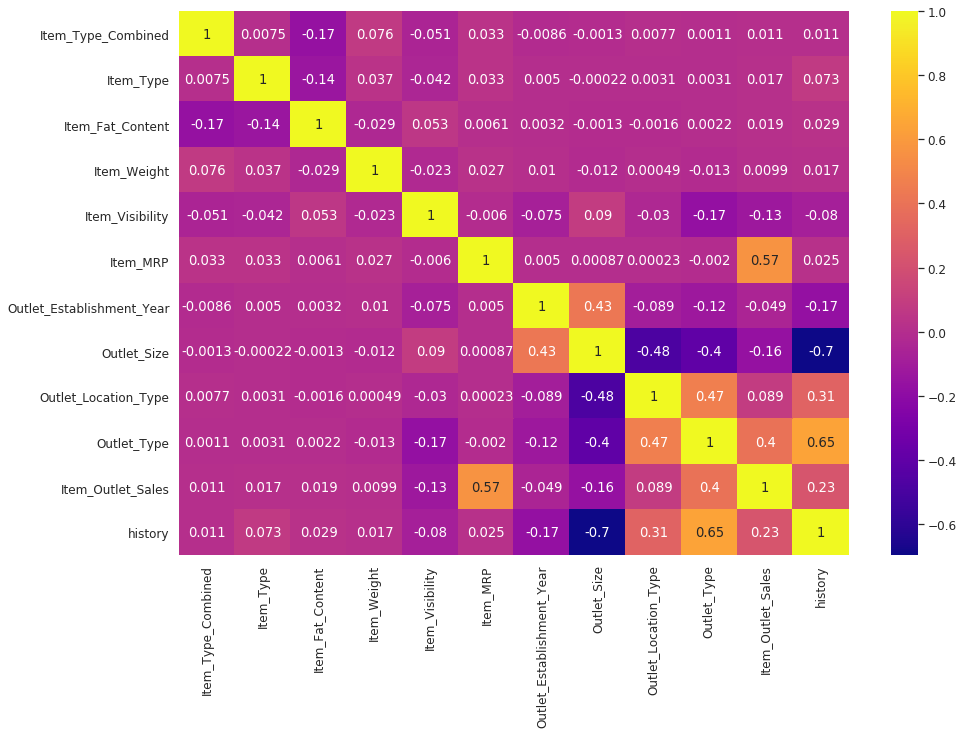

In [105]:
#Plotting heatmap and visualizing correlation between variables.
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(train.corr(),cmap='plasma',annot=True);

**Observation :** 

1. Item Outlet Sales & Item MRP has more coorelation.Feature selected

2. Outlet Size & Outlet Eastablishment Year are somewhat correlated(0.43)

3. Outlet Type & Outlet Location Type are somewhat correlated(0.47)

4. Item Outlet Sales & Outlet  are correlated.Feature Selected.

In [106]:
crosstable = pd.crosstab(train['Outlet_Establishment_Year'],train['Outlet_Size'])
crosstable

Outlet_Size,0,1,2
Outlet_Establishment_Year,,,
1985,0,935,528
1987,932,0,0
1997,0,0,930
1998,0,0,555
1999,0,930,0
2002,0,0,929
2004,0,0,930
2007,0,0,926
2009,0,928,0


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Type_Combined         8523 non-null   int64  
 2   Item_Type                  8523 non-null   int64  
 3   Item_Fat_Content           8523 non-null   int64  
 4   Item_Weight                8523 non-null   float64
 5   Item_Visibility            8523 non-null   float64
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                8523 non-null   int64  
 10  Outlet_Location_Type       8523 non-null   int64  
 11  Outlet_Type                8523 non-null   int64  
 12  Item_Outlet_Sales          8523 non-null   float64
 13  history                    8523 non-null   float

In [108]:
train.head()

,Item_Identifier,Item_Type_Combined,Item_Type,Item_Fat_Content,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,history
0,FDA15,1,4,0,9.30,0.016047,249.8092,OUT049,1999,1,0,1,3735.1380,2725.360676
1,DRC01,0,14,1,5.92,0.019278,48.2692,OUT018,2009,1,2,2,443.4228,2437.250807
2,FDN15,1,10,0,17.50,0.016760,141.6180,OUT049,1999,1,0,1,2097.2700,2792.575217
3,FDX07,1,6,1,19.20,0.022911,182.0950,OUT010,1998,2,2,0,732.3800,1926.025650
4,NCD19,2,9,0,8.93,0.016164,53.8614,OUT013,1987,0,2,1,994.7052,2408.217992


In [109]:
Feature_var = ['Item_Type_Combined','Item_Fat_Content','Item_Visibility','Item_MRP',
               'Item_Type','Outlet_Establishment_Year','Outlet_Type']
x=train[Feature_var]
y=train.Item_Outlet_Sales

In [110]:
x.head(5)

,Item_Type_Combined,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Type,Outlet_Establishment_Year,Outlet_Type
0,1,0,0.016047,249.8092,4,1999,1
1,0,1,0.019278,48.2692,14,2009,2
2,1,0,0.016760,141.6180,10,1999,1
3,1,1,0.022911,182.0950,6,1998,0
4,2,0,0.016164,53.8614,9,1987,1


In [111]:
y.head(5)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5966, 7), (2557, 7), (5966,), (2557,))

In [113]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)
X_test= st_x.fit_transform(X_test)

In [114]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# training Linear Regression model on training data
lin_reg.fit(X_train,y_train)

LinearRegression()

In [115]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn import metrics
print('Linear Regression Regression Results: ')

train_score = lin_reg.score(X_train, y_train)
print('Training Accuracy:', train_score.round(5))
test_score = lin_reg.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(5))
y_pred_linreg = lin_reg.predict(X_test)

Linear Regression Regression Results: 
Training Accuracy: 0.48657
Testing Accuracy: 0.48861


Feature: 0, Score: -6.60968
Feature: 1, Score: 24.43195
Feature: 2, Score: -89.78751
Feature: 3, Score: 961.53829
Feature: 4, Score: 4.85366
Feature: 5, Score: -4.88331
Feature: 6, Score: 655.14028


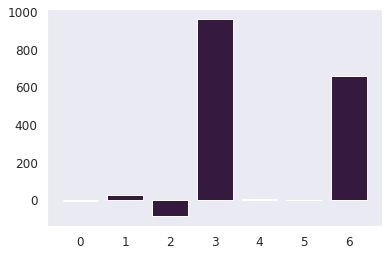

In [116]:
from matplotlib import pyplot
importance = lin_reg.coef_
#importance.sort_values(by='importance', ascending=False)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [117]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X_train, y_train)
from sklearn import metrics
print('Decision Regression Regression Results: ')

train_score = regr.score(X_train, y_train)
print('Training Accuracy:', train_score.round(5))
test_score = regr.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(5))
y_pred_decreg = regr.predict(X_test)

Decision Regression Regression Results: 
Training Accuracy: 0.42883
Testing Accuracy: 0.42879


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.54858
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.45142


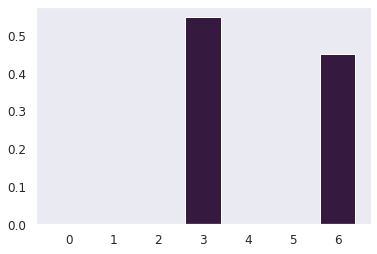

In [118]:
importance = regr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(X_train, y_train)   



RandomForestRegressor(random_state=0)

In [120]:
from sklearn import metrics
print('Random Forest Regression Regression Results: ')

train_score = regressor.score(X_train, y_train)
print('Training Accuracy:', train_score.round(5))
test_score = regressor.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(5))

Random Forest Regression Regression Results: 
Training Accuracy: 0.93683
Testing Accuracy: 0.56258


<BarContainer object of 7 artists>

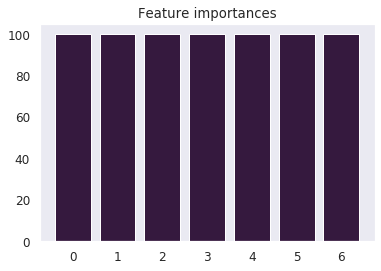

In [121]:
from sklearn.inspection import permutation_importance
regressor.feature_importances_
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),height=100)

In [122]:
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [123]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42,n_jobs=-1)
X_res, y_res = sm.fit_resample(x,y)
sm.fit(X_res, y_res)
importances = clf_rfc_3.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rfc_3.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]))

ValueError: Unknown label type: 'continuous'

In [124]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm


In [125]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

NameError: name 'StratifiedKFold' is not defined

In [126]:
from sklearn.preprocessing import MinMaxScale
from sklearn.model_selection import cross_val_score, GridSearchCV

ImportError: cannot import name 'MinMaxScale' from 'sklearn.preprocessing' (/home/hermione/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [127]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))